## Task 3

In [14]:
#simulations with different paramters values with trolls
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
N = 10000
timesteps = 1000
num_runs = 10

# Values for cmax and p_plus
cmax_values = np.linspace(0.1, 1.0, 5)
p_plus_values = np.linspace(0.1, 0.9, 5)  # Example range of p_plus values
troll_frac = 0.1  # Assuming troll_frac is kept constant

# Prepare lists to store the results for each combination of cmax and p_plus
results_troll = {}

for cmax in cmax_values:
    for p_plus in p_plus_values:
        
        # Run multiple simulations for the current cmax, p_plus combination
        all_avg_beliefs = np.zeros((num_runs, timesteps))
        all_belief_variances = np.zeros((num_runs, timesteps))
        all_pos_belief_fractions = np.zeros((num_runs, timesteps))

        for run in range(num_runs):
            avg_beliefs, belief_variances, pos_belief_fractions = run_simulation(N, cmax, p_plus, troll_frac, timesteps)
            all_avg_beliefs[run, :] = avg_beliefs
            all_belief_variances[run, :] = belief_variances
            all_pos_belief_fractions[run, :] = pos_belief_fractions

        # Compute mean and confidence intervals for the current parameter set
        avg_beliefs_ci = compute_confidence_intervals(all_avg_beliefs, num_runs)
        belief_variances_ci = compute_confidence_intervals(all_belief_variances, num_runs)
        pos_belief_fractions_ci = compute_confidence_intervals(all_pos_belief_fractions, num_runs)

        # Store results for this combination of cmax and p_plus
        results_troll[(cmax, p_plus)] = {
            "avg_beliefs": avg_beliefs_ci,
            "belief_variances": belief_variances_ci,
            "pos_belief_fractions": pos_belief_fractions_ci
        }

        # Optionally, plot the results
       # plot_results(timesteps, avg_beliefs_ci, belief_variances_ci, pos_belief_fractions_ci)

        # Print the final values for each run
        #print(f"cmax = {cmax}, p_plus = {p_plus}")
        #print(f"Final Average Belief: {avg_beliefs_ci[0][-1]:.4f} ± {avg_beliefs_ci[1][-1]:.4f}")
        #print(f"Final Belief Polarization: {belief_variances_ci[0][-1]:.4f} ± {belief_variances_ci[1][-1]:.4f}")
       # print(f"Final Fraction of Positive Beliefs: {pos_belief_fractions_ci[0][-1]:.4f} ± {pos_belief_fractions_ci[1][-1]:.4f}")
        #print()




In [16]:
#VN order 2
def update_beliefs2(grid, N):
    """Selects 10% of non-troll agents and updates their beliefs based on Von Neumann neighbors (order 2)."""
    grid_size = len(grid)
    non_troll_agents = [agent for row in grid for agent in row if not agent.is_troll]
    selected_indices = np.random.choice(len(non_troll_agents), size=int(0.1 * N), replace=False)

    for idx in selected_indices:
        agent = non_troll_agents[idx]
        i, j = agent.i, agent.j

        # Get Von Neumann neighbors of order 2 (Manhattan distance ≤ 2)
        neighbors = [
            grid[(i-1) % grid_size][j],   # North (1 step)
            grid[(i-2) % grid_size][j],   # North (2 steps)
            grid[(i+1) % grid_size][j],   # South (1 step)
            grid[(i+2) % grid_size][j],   # South (2 steps)
            grid[i][(j-1) % grid_size],   # West (1 step)
            grid[i][(j-2) % grid_size],   # West (2 steps)
            grid[i][(j+1) % grid_size],   # East (1 step)
            grid[i][(j+2) % grid_size]    # East (2 steps)
        ]

        # Compute the influence of the neighbors
        influence = sum(nb.convincing_power * nb.belief for nb in neighbors)
        
        # Update the agent's belief based on the averaged influence
        agent.belief += influence / len(neighbors)
        agent.belief = np.clip(agent.belief, -1, 1)  # Maintain beliefs in [-1,1]


In [23]:
#simulationVN of order 2
def run_simulation2(N, cmax, p_plus, troll_frac, timesteps):
    """Runs a single simulation and returns belief evolution over time."""
    grid = initialize_grid(N, cmax, p_plus, troll_frac)

    avg_beliefs, belief_variances, pos_belief_fractions = [], [], []
    for _ in range(timesteps):
        avg_belief, var_belief, pos_frac = collect_statistics(grid)
        avg_beliefs.append(avg_belief)
        belief_variances.append(var_belief)
        pos_belief_fractions.append(pos_frac)
        update_beliefs2(grid, N)
    return np.array(avg_beliefs), np.array(belief_variances), np.array(pos_belief_fractions)


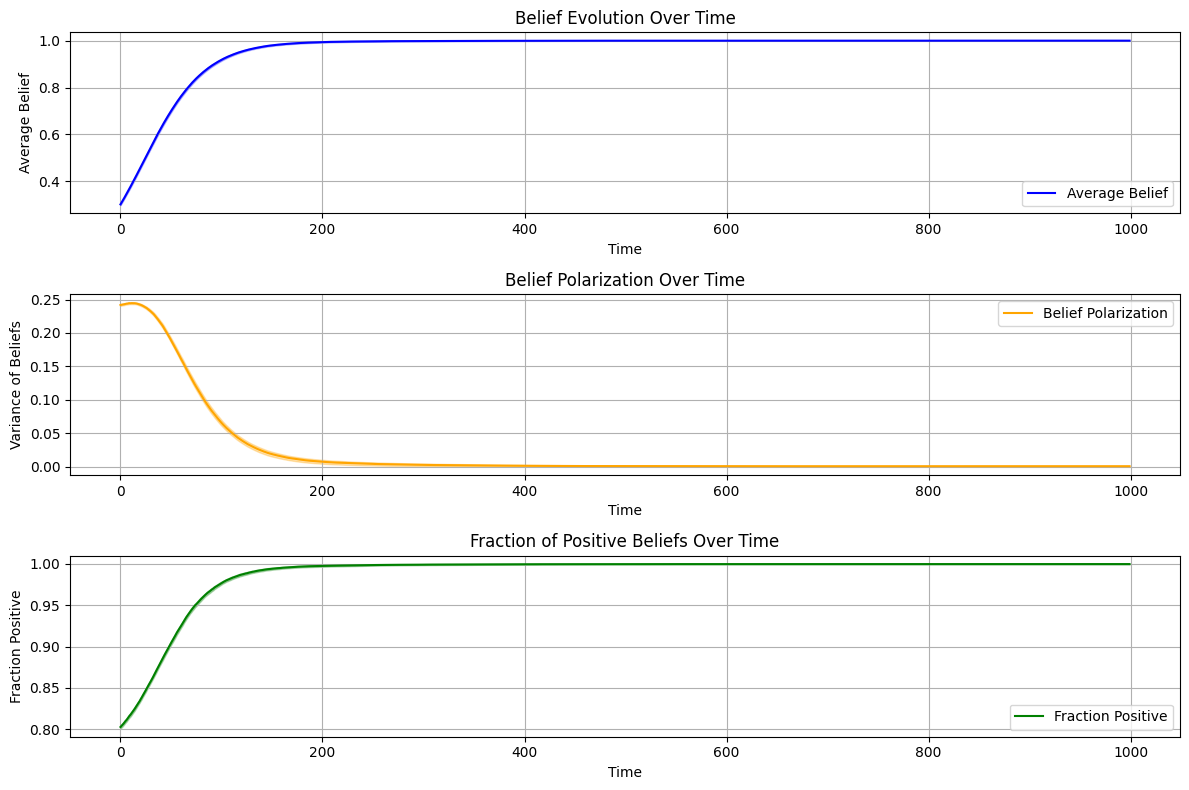

In [35]:
# Simulation using VN of order 2 without trolls
N = 10000
cmax = 0.5
p_plus = 0.8
troll_frac = 0
timesteps = 1000
num_runs = 10


# Run multiple simulations
all_avg_beliefs = np.zeros((num_runs, timesteps))
all_belief_variances = np.zeros((num_runs, timesteps))
all_pos_belief_fractions = np.zeros((num_runs, timesteps))

for run in range(num_runs):
    avg_beliefs, belief_variances, pos_belief_fractions = run_simulation2(N, cmax, p_plus, troll_frac, timesteps)
    all_avg_beliefs[run, :] = avg_beliefs
    all_belief_variances[run, :] = belief_variances
    all_pos_belief_fractions[run, :] = pos_belief_fractions


# Compute mean and confidence intervals
avg_beliefs = compute_confidence_intervals(all_avg_beliefs, num_runs)
belief_variances = compute_confidence_intervals(all_belief_variances, num_runs)
pos_belief_fractions = compute_confidence_intervals(all_pos_belief_fractions, num_runs)

# Plot results
plot_results(timesteps, avg_beliefs, belief_variances, pos_belief_fractions)


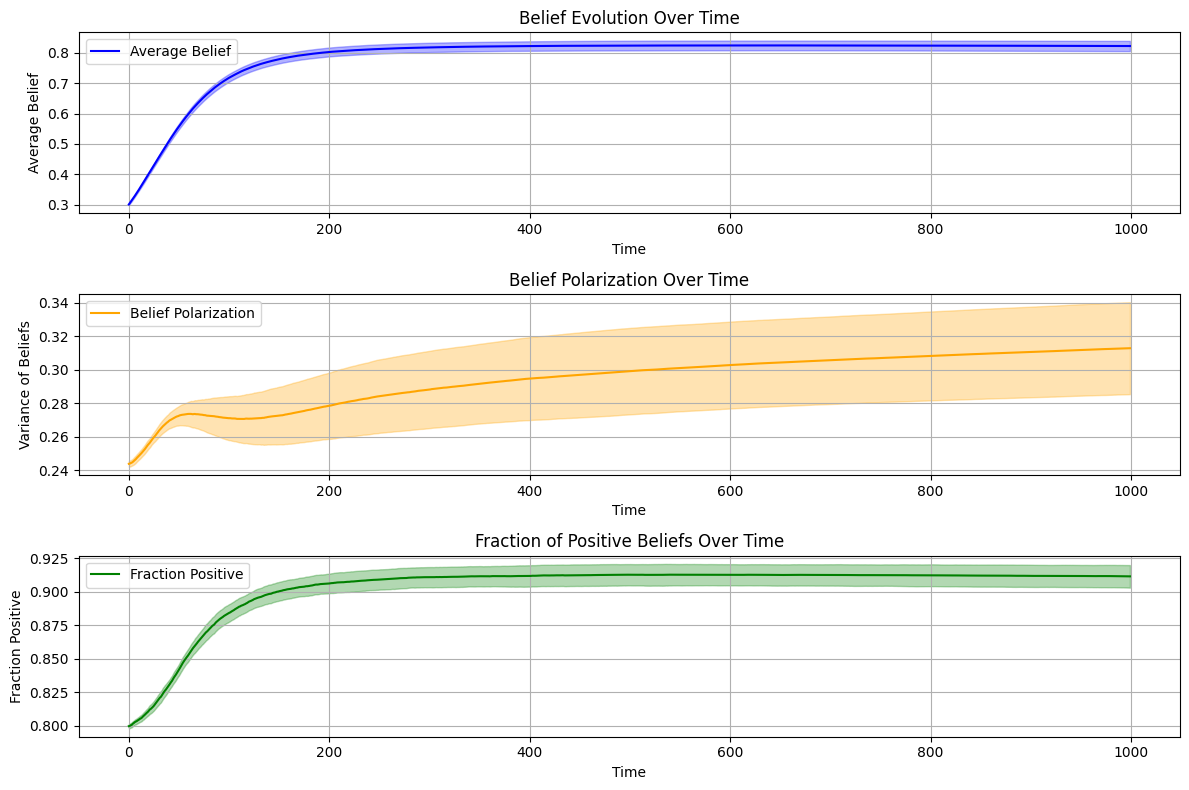

In [25]:
# Simulation VN of order 2  with 0.1 trolls
N = 10000
cmax = 0.5
p_plus = 0.8
troll_frac = 0.1
timesteps = 1000
num_runs = 10


# Run multiple simulations
all_avg_beliefs = np.zeros((num_runs, timesteps))
all_belief_variances = np.zeros((num_runs, timesteps))
all_pos_belief_fractions = np.zeros((num_runs, timesteps))

for run in range(num_runs):
    avg_beliefs, belief_variances, pos_belief_fractions = run_simulation2(N, cmax, p_plus, troll_frac, timesteps)
    all_avg_beliefs[run, :] = avg_beliefs
    all_belief_variances[run, :] = belief_variances
    all_pos_belief_fractions[run, :] = pos_belief_fractions


# Compute mean and confidence intervals
avg_beliefs = compute_confidence_intervals(all_avg_beliefs, num_runs)
belief_variances = compute_confidence_intervals(all_belief_variances, num_runs)
pos_belief_fractions = compute_confidence_intervals(all_pos_belief_fractions, num_runs)

# Plot results
plot_results(timesteps, avg_beliefs, belief_variances, pos_belief_fractions)


In [30]:
#initializa grid when part of the population with negative belief concentrated in part of the region
def initialize_grid_neg(N, cmax, p_plus, troll_frac):
    grid_size = int(np.sqrt(N))
    grid = [[None for _ in range(grid_size)] for _ in range(grid_size)]

    # 🔹 Define the concentrated negative-belief region
    region_start_x, region_end_x = grid_size // 4, grid_size // 2
    region_start_y, region_end_y = grid_size // 4, grid_size // 2
    negative_region_size = (region_end_x - region_start_x) * (region_end_y - region_start_y)

    # 🔹 Assign beliefs & convincing power
    for i in range(grid_size):
        for j in range(grid_size):
            is_troll = np.random.rand() < troll_frac
            convincing_power = np.random.uniform(0, cmax)

            # Assign negative beliefs to the predefined region
            if region_start_x <= i < region_end_x and region_start_y <= j < region_end_y:
                belief = np.random.uniform(-1, 0)
            else:
                belief = -1.0 if is_troll else (
                    np.random.uniform(0, 1) if np.random.rand() < p_plus else np.random.uniform(-1, 0)
                )

            grid[i][j] = Agent(i, j, is_troll, belief, convincing_power)

    return grid

def run_simulation_neg(N, cmax, p_plus, troll_frac, timesteps):
    """Runs a single simulation and returns belief evolution over time."""
    grid = initialize_grid_neg(N, cmax, p_plus, troll_frac)

    avg_beliefs, belief_variances, pos_belief_fractions = [], [], []
    for _ in range(timesteps):
        avg_belief, var_belief, pos_frac = collect_statistics(grid)
        avg_beliefs.append(avg_belief)
        belief_variances.append(var_belief)
        pos_belief_fractions.append(pos_frac)
        update_beliefs(grid, N)
    return np.array(avg_beliefs), np.array(belief_variances), np.array(pos_belief_fractions)

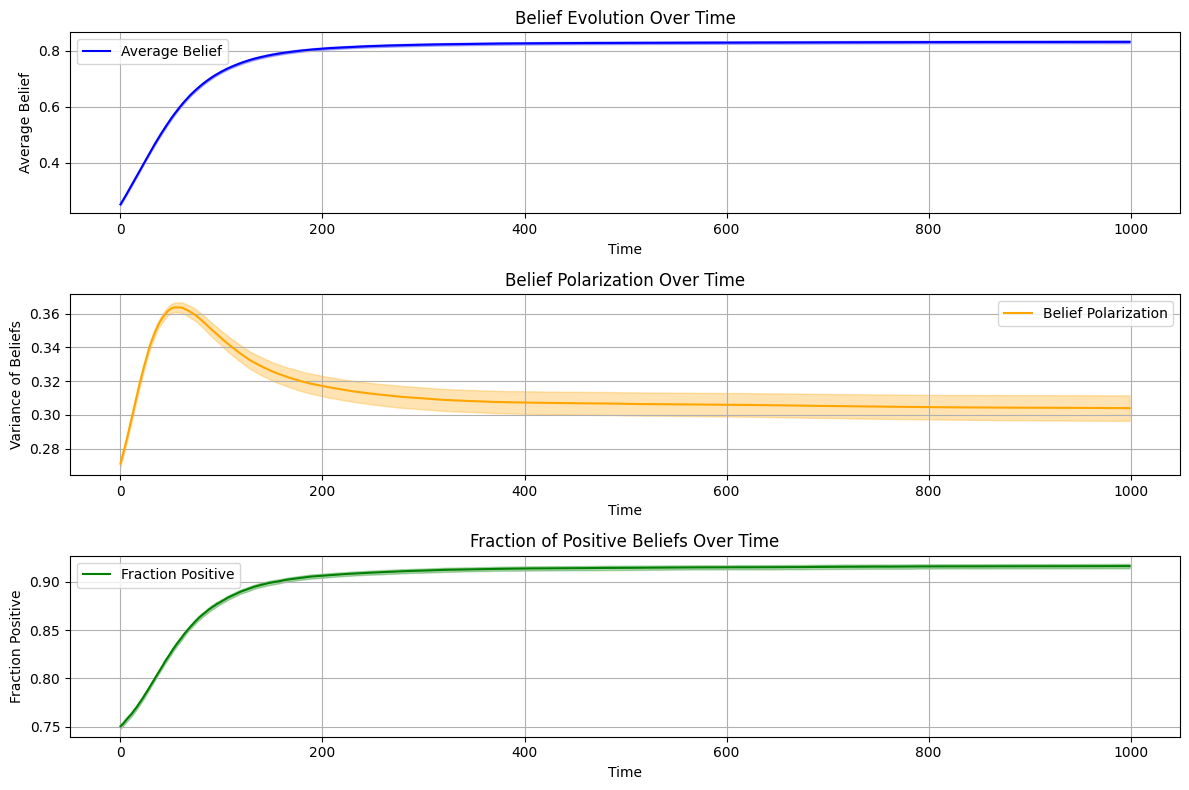

In [32]:
# simulation when part of the population with negative belief concentrated in part of the region without trolls
N = 10000
cmax = 0.5
p_plus = 0.8
troll_frac = 0
timesteps = 1000
num_runs = 10


# Run multiple simulations
all_avg_beliefs = np.zeros((num_runs, timesteps))
all_belief_variances = np.zeros((num_runs, timesteps))
all_pos_belief_fractions = np.zeros((num_runs, timesteps))

for run in range(num_runs):
    avg_beliefs, belief_variances, pos_belief_fractions = run_simulation_neg(N, cmax, p_plus, troll_frac, timesteps)
    all_avg_beliefs[run, :] = avg_beliefs
    all_belief_variances[run, :] = belief_variances
    all_pos_belief_fractions[run, :] = pos_belief_fractions


# Compute mean and confidence intervals
avg_beliefs = compute_confidence_intervals(all_avg_beliefs, num_runs)
belief_variances = compute_confidence_intervals(all_belief_variances, num_runs)
pos_belief_fractions = compute_confidence_intervals(all_pos_belief_fractions, num_runs)

# Plot results
plot_results(timesteps, avg_beliefs, belief_variances, pos_belief_fractions)
